In [37]:
import sys  
sys.path.insert(0, '../code')
import deep_tree
import torch as th
from torch import nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi

In [38]:
# 1000 x 2 ==> batch x features
x = th.rand([1000, 2])
x[:, 0] *= 2*pi
x[:, 0] -= pi
x[:, 1] *= 3
x[:, 1] -= 1.5

# Labels
y = (th.sin(x[:, 0]) < x[:, 1]).long()

# Subset map. Will be randomized when we use the RF
features = {
    15: th.tensor([0, 1]),
    14: th.tensor([0, 1]),
    13: th.tensor([0, 1]),
    12: th.tensor([0, 1]),
    11: th.tensor([0, 1]),
    10: th.tensor([0, 1]),
    9: th.tensor([0, 1]),
    8: th.tensor([0, 1]),
    7: th.tensor([0, 1]),
    6: th.tensor([0, 1]),
    5: th.tensor([0, 1]),
    4: th.tensor([0, 1]),
    3: th.tensor([0, 1]),
    2: th.tensor([0, 1]),
    1: th.tensor([0, 1])
}

In [39]:
model = deep_tree.Node(features, 10, 4, 1)

In [40]:
device = th.device("cuda" if th.cuda.is_available() else "cpu")
model = model.to(device)
x = x.to(device)
y = y.to(device)

In [41]:
optimizer = th.optim.Adam(model.parameters())
for i in range(2000):
    model.populate_best(x[:900, :], y[:900])
    optimizer.zero_grad()

    loss = model.loss(x[:900, :], y[:900], th.tensor([0], dtype=th.float32).to(device), device)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print("====EPOCH %d====\nAcc: %s\nLoss: %s" % (i, str(th.mean((model.forward(x[:900, :], device) == y[:900]).float())), str(loss)))

print("==============\nFINAL ACC: %s" % str(th.mean((model.forward(x[:900, :], device) == y[:900]).float())))

====EPOCH 0====
Acc: tensor(0.8200)
Loss: tensor([21.5295], grad_fn=<AddBackward0>)
====EPOCH 100====
Acc: tensor(0.8722)
Loss: tensor([20.9580], grad_fn=<AddBackward0>)
====EPOCH 200====
Acc: tensor(0.8989)
Loss: tensor([20.9231], grad_fn=<AddBackward0>)
====EPOCH 300====
Acc: tensor(0.9011)
Loss: tensor([20.4729], grad_fn=<AddBackward0>)
====EPOCH 400====
Acc: tensor(0.9011)
Loss: tensor([20.2012], grad_fn=<AddBackward0>)
====EPOCH 500====
Acc: tensor(0.9200)
Loss: tensor([19.9457], grad_fn=<AddBackward0>)
====EPOCH 600====
Acc: tensor(0.9344)
Loss: tensor([19.8353], grad_fn=<AddBackward0>)
====EPOCH 700====
Acc: tensor(0.9533)
Loss: tensor([20.1618], grad_fn=<AddBackward0>)
====EPOCH 800====
Acc: tensor(0.9589)
Loss: tensor([20.1810], grad_fn=<AddBackward0>)
====EPOCH 900====
Acc: tensor(0.9722)
Loss: tensor([19.7074], grad_fn=<AddBackward0>)
====EPOCH 1000====
Acc: tensor(0.9733)
Loss: tensor([20.0569], grad_fn=<AddBackward0>)
====EPOCH 1100====
Acc: tensor(0.9778)
Loss: tensor([20

tensor([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0])
tensor([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0])


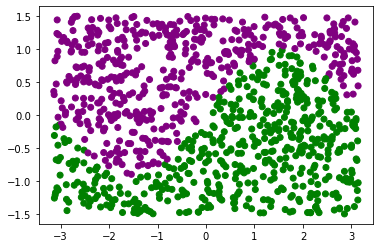

In [42]:
print(y[:15])
print(model.forward(x, device)[:15].long())
cdict = {0: 'green', 1: 'purple'}
plt.scatter(x[:, 0], x[:, 1], c=[cdict[i] for i in model.forward(x, device).cpu().numpy()])
plt.show()

In [43]:
mlp = nn.Sequential(
    nn.Linear(2, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 2),
    nn.Softmax()
)

optimizer = th.optim.Adam(mlp.parameters())
for i in range(1000):
    optimizer.zero_grad()

    preds = mlp(x[:900, :])
    loss = nn.functional.cross_entropy(preds, (y[:900].type(th.LongTensor)).to(device))
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print("====EPOCH %d====\nAcc: %s\nLoss: %s" % (i, str(th.mean((th.argmax(mlp(x[900:]), 1) == y[900:]).float())), str(loss)))

print("==============\nFINAL ACC: %s" % str(th.mean((th.argmax(mlp(x[900:]), 1) == y[900:]).float())))

====EPOCH 0====
Acc: tensor(0.4900)
Loss: tensor(0.6627, grad_fn=<NllLossBackward>)
====EPOCH 100====
Acc: tensor(0.8400)
Loss: tensor(0.4912, grad_fn=<NllLossBackward>)
====EPOCH 200====
Acc: tensor(0.8600)
Loss: tensor(0.4105, grad_fn=<NllLossBackward>)
====EPOCH 300====
Acc: tensor(0.9000)
Loss: tensor(0.3808, grad_fn=<NllLossBackward>)
====EPOCH 400====
Acc: tensor(0.9500)
Loss: tensor(0.3596, grad_fn=<NllLossBackward>)
====EPOCH 500====
Acc: tensor(0.9600)
Loss: tensor(0.3466, grad_fn=<NllLossBackward>)
====EPOCH 600====
Acc: tensor(0.9700)
Loss: tensor(0.3386, grad_fn=<NllLossBackward>)
====EPOCH 700====
Acc: tensor(0.9900)
Loss: tensor(0.3337, grad_fn=<NllLossBackward>)
====EPOCH 800====
Acc: tensor(0.9900)
Loss: tensor(0.3305, grad_fn=<NllLossBackward>)
====EPOCH 900====
Acc: tensor(0.9900)
Loss: tensor(0.3283, grad_fn=<NllLossBackward>)
FINAL ACC: tensor(0.9900)


In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x[:900, :].numpy(), y[:900].numpy())
print(clf.score(x[900:, :].numpy(), y[900:].numpy()))

0.95
